## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Imports

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ORIGINAL DATASET

In [2]:
df = pd.read_csv('data/kc_house_data.csv')


Initial reading of file a dChecking NAs/Duplicates

In [3]:
#21 columns, 21597 rows, so far only waterfront and yr_renovated are clearly missing values
#date is object right now
#waterfront,view,condition,grade,sqft_basement are objects
#df.info()
        
#19422 nones in view
#df['view'].value_counts()

#df 3-13, poor to mansion, mostly in mid-range
#df['grade'].value_counts()

#2376 - waterfront
#63 - view
#3842 - yr_renovated
#df.isna().sum()

#15762 rows when NAs are dropped
#df.dropna()

#no duplicates
#df.duplicated().sum()

#dropping columns can be done before
#filling in blanks and missingness, fit and transformations, after train-test-split

#df.info()

DESCRIBE

In [4]:
#looks like categories with sqft tends to have outliers
#also maxes of bedrooms (33) and bathrooms (8) seem to be outliers
#most houses were built before the 2000s
#price 75-25 percentile range is 4.50-3.22
#Looks like there are 70 zipcodes in total
#Houses sold only in the year 2014-2015

#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Removing 33 bedroom house

In [5]:
df = df.loc[df['bedrooms']<30]

# REMOVING ? IN SQFT_BASEMENT

In [6]:
#df.loc[df['sqft_basement'] == 'None', 'sqft_basement'] = 'NaN'
#df['sqft_basement'].value_counts()
#df.dropna(subset = ['sqft_basement'],inplace=True)
#df.drop(df[(df['sqft_basement'] == 'NAN')],axis=1,inplace=True)

df = df.loc[df['sqft_basement']!= '?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21142 non-null  int64  
 1   date           21142 non-null  object 
 2   price          21142 non-null  float64
 3   bedrooms       21142 non-null  int64  
 4   bathrooms      21142 non-null  float64
 5   sqft_living    21142 non-null  int64  
 6   sqft_lot       21142 non-null  int64  
 7   floors         21142 non-null  float64
 8   waterfront     18803 non-null  object 
 9   view           21081 non-null  object 
 10  condition      21142 non-null  object 
 11  grade          21142 non-null  object 
 12  sqft_above     21142 non-null  int64  
 13  sqft_basement  21142 non-null  object 
 14  yr_built       21142 non-null  int64  
 15  yr_renovated   17388 non-null  float64
 16  zipcode        21142 non-null  int64  
 17  lat            21142 non-null  float64
 18  long  

# CHANGING DATE SOLD COLUMN SO I CAN ANALYZE BY MONTH AND YEAR WHEN I WANT TO, DID DAY AS WELL JUST IN CASE

In [7]:
#df= pd.to_datetime(df['date'])
#df

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

#df
#df.info()

# CHANGING GRADE COLUMN TO RATING AND CONDITION

In [9]:
rating = df['grade'].str.split(" ",expand=True)
df['rating'] = rating[0].astype(float)
df['condition'] = rating[1]
df.loc[df['condition'] == 'Very', 'condition'] = 'Amazing'


# # CHANGING WATERFRONT SO THAT IF VIEW IS NO AND WATERFRONT IS NAN THEN WATERFRONT IS NO

In [10]:
df.loc[df['view'] == 'NONE', 'waterfront'] = 'NO'
df['waterfront'].value_counts()

NO     20738
YES      142
Name: waterfront, dtype: int64

In [11]:
df['rating'] = df['rating'].astype(int)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,rating
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,98178,47.5112,-122.257,1340,5650,2014,10,13,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,NaN,98028,47.7379,-122.233,2720,8062,2015,2,25,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,47.5208,-122.393,1360,5000,2014,12,9,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,98074,47.6168,-122.045,1800,7503,2015,2,18,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,98103,47.6993,-122.346,1530,1509,2014,5,21,8
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,98146,47.5107,-122.362,1830,7200,2015,2,23,8
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,98144,47.5944,-122.299,1020,2007,2014,6,23,7
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0.0,98027,47.5345,-122.069,1410,1287,2015,1,16,8


# CHANGING YR RENOV TO YR BUILT IF YR RENOV = 0 THEN DROPPING NAS AND CHANGING TO INT

In [12]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df.dropna(subset = ['yr_renovated'],inplace=True)
df['yr_renovated'] = df['yr_renovated'].astype(int)

In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,rating
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1955,98178,47.5112,-122.257,1340,5650,2014,10,13,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,7
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,98136,47.5208,-122.393,1360,5000,2014,12,9,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,98074,47.6168,-122.045,1800,7503,2015,2,18,8
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,2001,98053,47.6561,-122.005,4760,101930,2014,5,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,98103,47.6993,-122.346,1530,1509,2014,5,21,8
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,98146,47.5107,-122.362,1830,7200,2015,2,23,8
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,98144,47.5944,-122.299,1020,2007,2014,6,23,7
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,2004,98027,47.5345,-122.069,1410,1287,2015,1,16,8


# NOW THAT DATE, DAY AND GRADE HAVE BEEN CHANGED CAN GET RID

In [14]:
df.drop(['date','day','grade','id','long','lat','year'],axis=1,inplace=True)


high price for max, bathrooms, bed

# CHANGE NUMERICAL VALUES TO FLOATS AND INTS RESPECTIVELY

In [15]:
numerical = df.drop(['waterfront','view','condition'], axis=1)
numerical[['bathrooms','floors']]= numerical[['bathrooms','floors']].astype(int)
numerical[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']] = numerical[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].astype(float)
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17388 non-null  float64
 1   bedrooms       17388 non-null  int64  
 2   bathrooms      17388 non-null  int64  
 3   sqft_living    17388 non-null  float64
 4   sqft_lot       17388 non-null  float64
 5   floors         17388 non-null  int64  
 6   sqft_above     17388 non-null  float64
 7   sqft_basement  17388 non-null  float64
 8   yr_built       17388 non-null  int64  
 9   yr_renovated   17388 non-null  int64  
 10  zipcode        17388 non-null  int64  
 11  sqft_living15  17388 non-null  float64
 12  sqft_lot15     17388 non-null  float64
 13  month          17388 non-null  int64  
 14  rating         17388 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 2.1 MB


# SEPARATE CATEGORIES

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# NUMERICAL

In [17]:
numerical.reset_index(inplace=True)

#numerical.drop(['level_0','index'], axis=1,inplace=True)


# ORDINALS = CONDITION, VIEW

In [18]:
df.dropna(inplace=True)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
month            0
rating           0
dtype: int64

In [19]:
ord_cat_selector = ['condition', 'view']
cat_subset = df[ord_cat_selector]
cat_subset.info()
cond_list = ['Poor','Fair','Low','Average','Good','Better','Amazing','Excellent','Luxury', 'Mansion']
view_list = ['NONE','FAIR','AVERAGE','GOOD','EXCELLENT']
o_enc = OrdinalEncoder(categories = [cond_list, view_list])
o_enc.fit(cat_subset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17130 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   condition  17130 non-null  object
 1   view       17130 non-null  object
dtypes: object(2)
memory usage: 401.5+ KB


OrdinalEncoder(categories=[['Poor', 'Fair', 'Low', 'Average', 'Good', 'Better',
                            'Amazing', 'Excellent', 'Luxury', 'Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [20]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition,view
0,3.0,0.0
1,3.0,0.0
2,3.0,0.0
3,4.0,0.0
4,7.0,0.0
...,...,...
17125,4.0,0.0
17126,4.0,0.0
17127,3.0,0.0
17128,4.0,0.0


# NOMINALS

In [21]:
from sklearn.preprocessing import OneHotEncoder
nom_cat = pd.DataFrame(df['waterfront'])
#nom_cat
onehot_enc = OneHotEncoder(drop='first',sparse = False)
nom_subset = pd.DataFrame(onehot_enc.fit_transform(nom_cat))

In [22]:
onehot_enc.get_feature_names_out()

array(['waterfront_YES'], dtype=object)

In [23]:
nom_subset.value_counts()

0.0    17014
1.0      116
dtype: int64

# JOIN NOM ORD AND NUM

In [59]:
final_df = numerical.join([X_subset,nom_subset],how='inner')
final_df = final_df.rename(columns={0:'waterfront'}).drop('index',axis=1)
#final_df.info()
#final_df['view'].value_counts()

final_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating,condition,view,waterfront
0,221900.0,3,1,1180.0,5650.0,1,1180.0,0.0,1955,1955,98178,1340.0,5650.0,10,7,3.0,0.0,0.0
1,538000.0,3,2,2570.0,7242.0,2,2170.0,400.0,1951,1991,98125,1690.0,7639.0,12,7,3.0,0.0,0.0
2,604000.0,4,3,1960.0,5000.0,1,1050.0,910.0,1965,1965,98136,1360.0,5000.0,12,7,3.0,0.0,0.0
3,510000.0,3,2,1680.0,8080.0,1,1680.0,0.0,1987,1987,98074,1800.0,7503.0,2,8,4.0,0.0,0.0
4,1230000.0,4,4,5420.0,101930.0,1,3890.0,1530.0,2001,2001,98053,4760.0,101930.0,5,11,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17125,320000.0,3,3,1450.0,1387.0,2,1180.0,270.0,2013,2013,98106,1450.0,1198.0,7,8,4.0,0.0,0.0
17126,415500.0,4,2,1750.0,4779.0,2,1750.0,0.0,2009,2009,98028,1580.0,4687.0,6,7,4.0,0.0,0.0
17127,590000.0,3,3,1740.0,1100.0,3,1740.0,0.0,2007,2007,98107,1370.0,1180.0,3,8,3.0,0.0,0.0
17128,950000.0,2,2,2200.0,2043.0,2,1760.0,440.0,2007,2007,98004,2020.0,1957.0,1,9,4.0,0.0,0.0


# CORRELATION MAP WITH EVERYTHING

In [60]:
final_df.corr().abs() > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating,condition,view,waterfront
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [61]:
'price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement,yr_built'

('price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_basement,yr_built')

# OUTLIERS

<AxesSubplot:ylabel='price'>

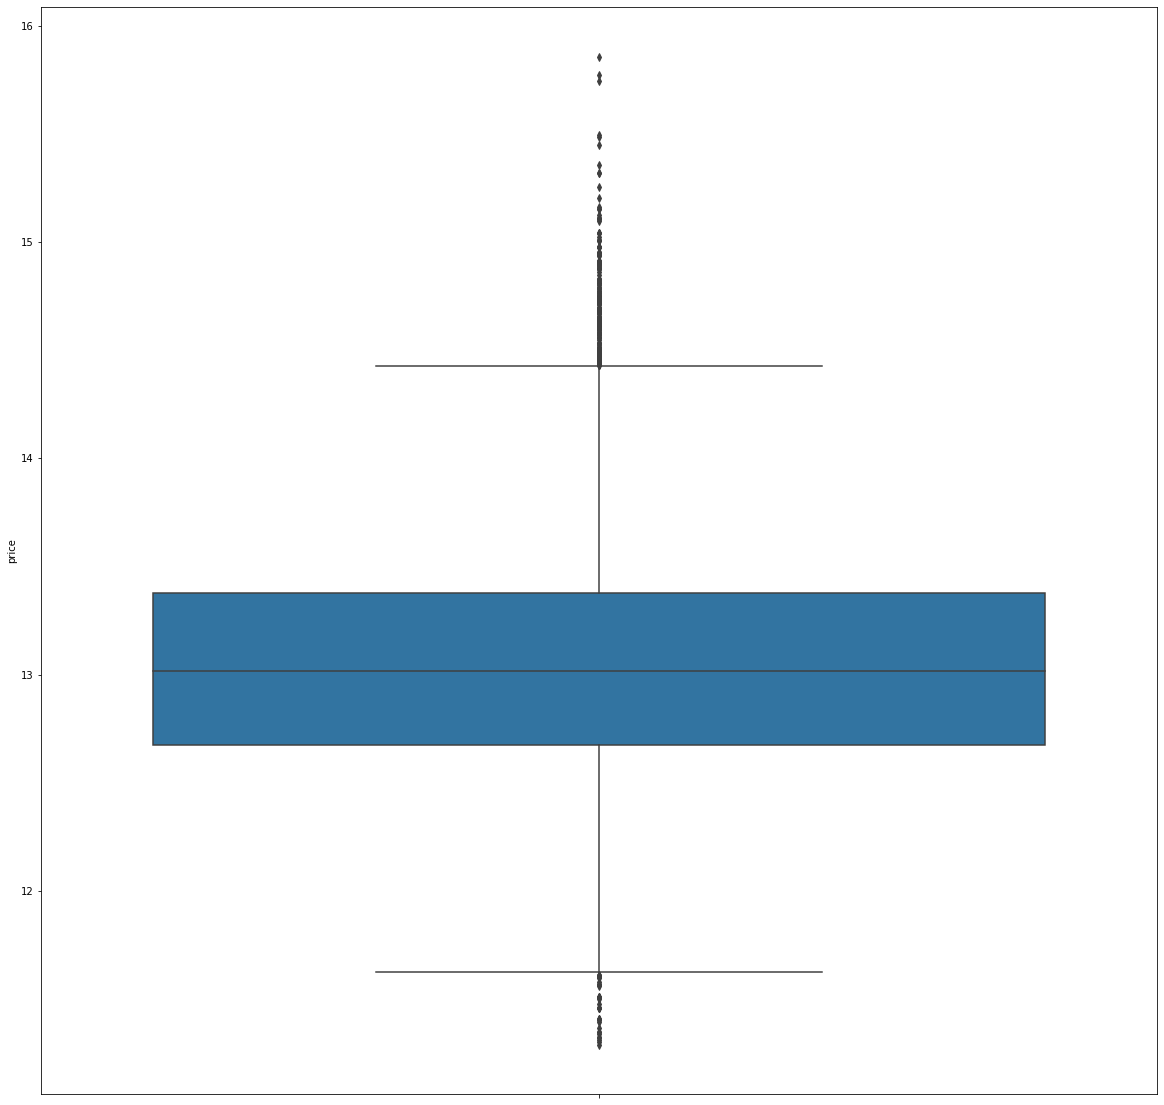

In [62]:
mean = final_df['price'].mean()
std = final_df['price'].std()
n = len(final_df['price'])
fig,ax=plt.subplots(figsize=(20,20))
#sns.distplot(ax=ax, x= np.log(final_df['price']))
sns.boxplot(ax=ax, data=final_df,y= np.log(final_df['price']))



TAKING OUT EVERYTHING THAT IS ABOVE 14.8K AND BELOW 11.7K

In [63]:
#fig,ax=plt.subplots()
#sns.boxplot(ax=ax, data=final_df,y= (final_df.loc[(np.log(final_df['price']) <= 14.8)&(np.log(final_df['price']) >= 11.7)]))

<AxesSubplot:ylabel='price'>

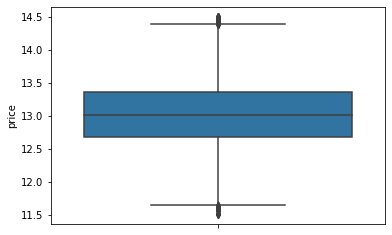

In [64]:
final_df= final_df.loc[(np.log(final_df['price']) <= 14.5)&(np.log(final_df['price']) >= 11.5)]
fig,ax=plt.subplots()
final_df
sns.boxplot(ax=ax, data=final_df,y= np.log(final_df['price']))

# VIF CALCULATION

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(final_df.values, i) for i in range(len(final_df.columns))]

# label the scores with their related columns
vif["features"] = final_df.columns

vif

/Users/evan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.158397e+01,price
1,2.532867e+01,bedrooms
2,1.620009e+01,bathrooms
3,inf,sqft_living
4,2.293504e+00,sqft_lot
5,1.684862e+01,floors
6,inf,sqft_above
7,inf,sqft_basement
8,2.964172e+04,yr_built
9,2.959966e+04,yr_renovated


# VIF BELOW 5

In [66]:
four_below = vif.loc[vif['VIF']<= 5]
four_below['features']

4       sqft_lot
12    sqft_lot15
16          view
17    waterfront
Name: features, dtype: object

# NEED TO NORMALIZE PRICE DUE TO SKEW

<AxesSubplot:xlabel='price', ylabel='Count'>

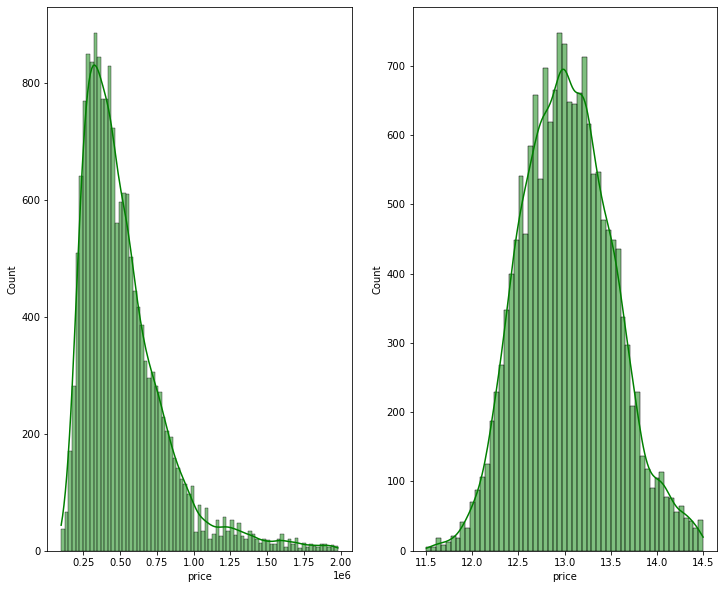

In [67]:
fig,ax =plt.subplots(nrows = 1, ncols=2,figsize=(12,10))
sns.histplot(final_df['price'],kde=True, color="green",ax=ax[0])
sns.histplot(np.log(final_df['price']),kde=True, color="green",ax=ax[1])

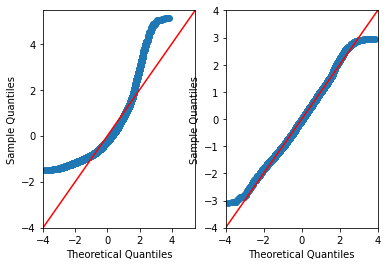

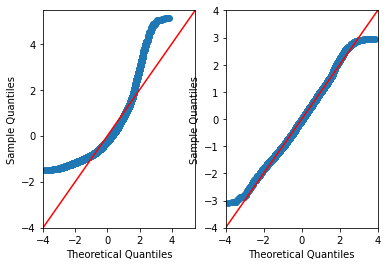

In [68]:
import statsmodels.api as sm
import scipy.stats as stats
fig, ax = plt.subplots(1,2)
sm.graphics.qqplot(final_df['price'], dist=stats.norm, line='45', fit=True, ax=ax[0])
sm.graphics.qqplot(np.log(final_df['price']), dist=stats.norm, line='45', fit=True, ax=ax[1])

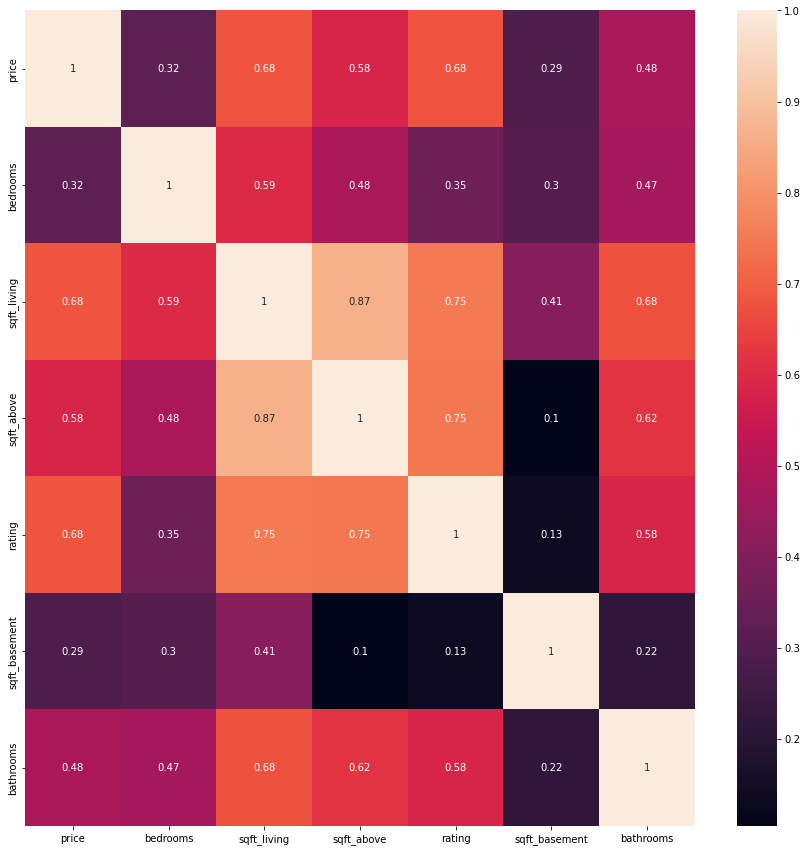

In [78]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(final_df[['price','bedrooms','sqft_living','sqft_above','rating','sqft_basement','bathrooms']].corr().abs(),annot=True);


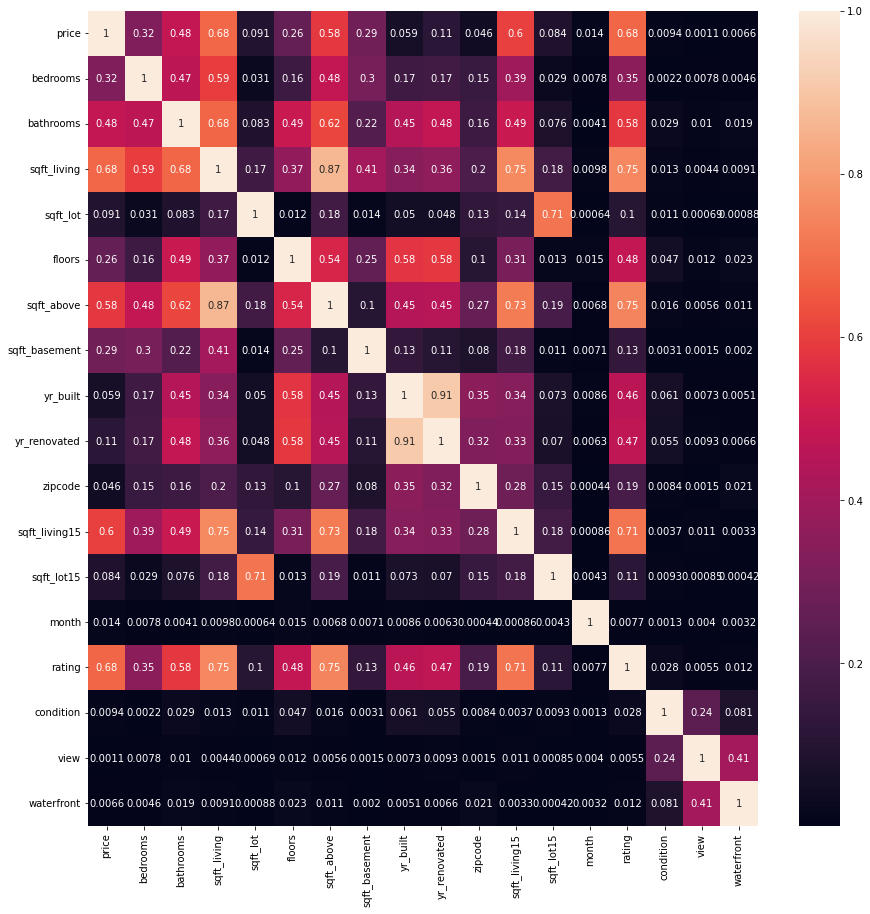

In [71]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(final_df.corr().abs(),annot=True);

# PAIR PLOT

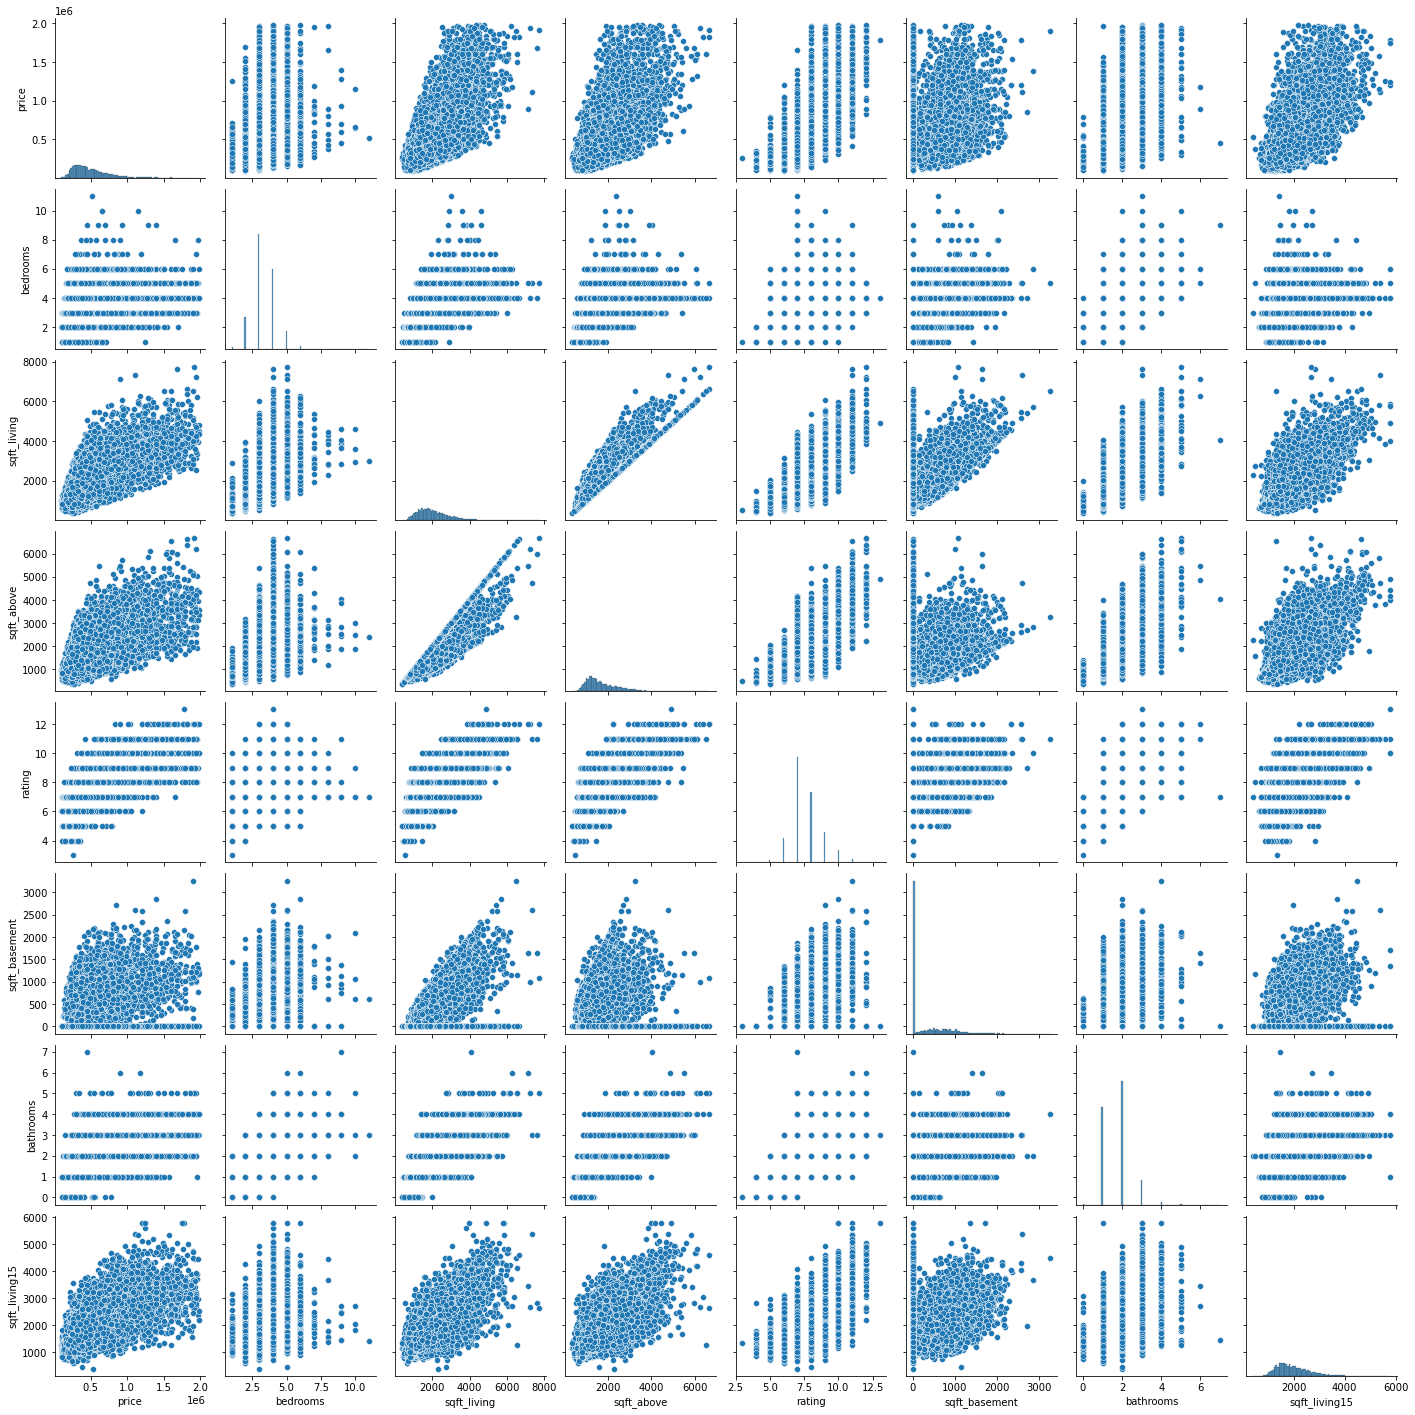

In [72]:
sns.pairplot(final_df[['price','bedrooms','sqft_living','sqft_above','rating','sqft_basement','bathrooms','sqft_living15']])

# RFE

In [84]:
#pd.plotting.scatter_matrix(final_df,alpha=0.2,)

from sklearn.feature_selection import RFE #does feature selection for you

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=6)
ss = StandardScaler()
ss.fit(final_df.drop('price', axis=1))

final_scaled = ss.transform(final_df.drop('price', axis=1))
select.fit(X=final_scaled, y=final_df['price'])

select.support_

array([ True, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False])

# FIRST MODEL

In [94]:
X = final_df.drop(columns='price')
y = final_df['price']

X= (X - np.mean(X)) / np.std(X)

X = sm.add_constant(X)
model = sm.OLS(endog=np.log(y), exog=X).fit()
model.summary()

/Users/evan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1654.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:51:25   Log-Likelihood:                -4195.0
No. Observations:               16945   AIC:                             8424.
Df Residuals:                   16928   BIC:                             8556.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0321      0.002   5470.615      0.000      13.027      13.037
bedrooms         -0.0193      0.003     -6.264      0.000      -0.025      -0.013
bathrooms         0.0363      0.004     10.073      0.000       0.029       0.043
sqft_living       0.0643      0.003     23.603      0.000       0.059       0.070
sqft_lot          0.0085      0.003      2.503      0.012       0.002       0.015
floors            0.0627      0.004     17.874      0.000       0.056       0.070
sqft_above        0.0350      0.003     12.313      0.000       0.029       0.041
sqft_basement     0.0639      0.002     25.638      0.000       0.059       0.069
yr_built         -0.1762      0.006    -29.676      0.000      -0.188      -0.165
yr_renovated      0.0080      0.006      1.339      0.181      -0.004       0.020
zipcode           0.0182      0.003      6.810      0.000       0.013       0.023
sqft_living15     0.0829      0.004     20.713      0.000       0.075       0.091
sqft_lot15       -0.0092      0.003     -2.679      0.007      -0.016      -0.002
month            -0.0130      0.002     -5.438      0.000      -0.018      -0.008
rating            0.2304      0.004     54.821      0.000       0.222       0.239
condition         0.0034      0.002      1.381      0.167      -0.001       0.008
view              0.0017      0.003      0.628      0.530      -0.004       0.007
waterfront        0.0021      0.003      0.785      0.433      -0.003       0.007
==============================================================================
Omnibus:                       28.292   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.303
Skew:                          -0.082   Prob(JB):                     4.33e-07
Kurtosis:                       3.122   Cond. No.                     2.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
smaller_df = final_df[['price','rating','sqft_living','bedrooms','view']]

X = smaller_df.drop(columns='price')
y = smaller_df['price']

X = (X - np.mean(X)) / np.std(X)

X = sm.add_constant(X)

model = sm.OLS(endog=np.log(y), exog=X).fit()
model.summary()

/Users/evan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4520.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:42:42   Log-Likelihood:                -6016.4
No. Observations:               16945   AIC:                         1.204e+04
Df Residuals:                   16940   BIC:                         1.208e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0321      0.003   4914.827      0.000      13.027      13.037
rating          0.1957      0.004     47.962      0.000       0.188       0.204
sqft_living     0.1954      0.005     41.172      0.000       0.186       0.205
bedrooms       -0.0193      0.003     -5.776      0.000      -0.026      -0.013
view            0.0029      0.003      1.100      0.271      -0.002       0.008
==============================================================================
Omnibus:                       66.292   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.907
Skew:                           0.093   Prob(JB):                     2.66e-13
Kurtosis:                       2.783   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# REMOVING 3 SQFT CATS BASED ON VIF CALCULATIONS --> MUCH WORSE

In [88]:
X_df = final_df[['price','sqft_lot','sqft_lot15','view','waterfront','rating']]
X_df = X_df.drop(columns='price')

y = final_df['price']

X_df= (X_df - np.mean(X_df)) / np.std(X_df)

X_df = sm.add_constant(X_df)
model = sm.OLS(endog=np.log(y), exog=X_df).fit()
model.summary()



/Users/evan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     2864.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:50:42   Log-Likelihood:                -6979.4
No. Observations:               16945   AIC:                         1.397e+04
Df Residuals:                   16939   BIC:                         1.402e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0321      0.003   4643.176      0.000      13.027      13.038
sqft_lot       0.0158      0.004      3.981      0.000       0.008       0.024
sqft_lot15    -0.0062      0.004     -1.548      0.122      -0.014       0.002
view           0.0028      0.003      0.910      0.363      -0.003       0.009
waterfront     0.0004      0.003      0.122      0.903      -0.006       0.006
rating         0.3347      0.003    118.399      0.000       0.329       0.340
==============================================================================
Omnibus:                       37.722   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.843
Skew:                           0.112   Prob(JB):                     6.06e-09
Kurtosis:                       2.941   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PAIRPLOT WITH 8 HIGHEST COEFFS

In [83]:
#sns.pairplot(smaller_df)

In [89]:

X = final_df.drop(columns='price')
y = final_df['price']

X= (X - np.mean(X)) / np.std(X)
X = sm.add_constant(X)
model = sm.OLS(endog=np.log(y), exog=X).fit()
model.summary()

/Users/evan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1654.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:50:51   Log-Likelihood:                -4195.0
No. Observations:               16945   AIC:                             8424.
Df Residuals:                   16928   BIC:                             8556.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0321      0.002   5470.615      0.000      13.027      13.037
bedrooms         -0.0193      0.003     -6.264      0.000      -0.025      -0.013
bathrooms         0.0363      0.004     10.073      0.000       0.029       0.043
sqft_living       0.0643      0.003     23.603      0.000       0.059       0.070
sqft_lot          0.0085      0.003      2.503      0.012       0.002       0.015
floors            0.0627      0.004     17.874      0.000       0.056       0.070
sqft_above        0.0350      0.003     12.313      0.000       0.029       0.041
sqft_basement     0.0639      0.002     25.638      0.000       0.059       0.069
yr_built         -0.1762      0.006    -29.676      0.000      -0.188      -0.165
yr_renovated      0.0080      0.006      1.339      0.181      -0.004       0.020
zipcode           0.0182      0.003      6.810      0.000       0.013       0.023
sqft_living15     0.0829      0.004     20.713      0.000       0.075       0.091
sqft_lot15       -0.0092      0.003     -2.679      0.007      -0.016      -0.002
month            -0.0130      0.002     -5.438      0.000      -0.018      -0.008
rating            0.2304      0.004     54.821      0.000       0.222       0.239
condition         0.0034      0.002      1.381      0.167      -0.001       0.008
view              0.0017      0.003      0.628      0.530      -0.004       0.007
waterfront        0.0021      0.003      0.785      0.433      -0.003       0.007
==============================================================================
Omnibus:                       28.292   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.303
Skew:                          -0.082   Prob(JB):                     4.33e-07
Kurtosis:                       3.122   Cond. No.                     2.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# SKLEARN MODELING BUT NOT THERE YET

In [110]:
#Define X and y variables
#'price',

X = final_df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement','yr_built']]
y = final_df['price']
#Train, test, split, here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Instantiate a new scaler
scaler = StandardScaler()
# Learn the pattern from the training data
scaler.fit(X_train)
# Apply the pattern to the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Turn these into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)
X_train_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built
587,-0.410508,-1.039149,-0.618867,-0.194588,-0.800094,-0.665551,0.459659
4283,-0.410508,-1.039149,-1.180309,-0.210508,-0.800094,-0.091368,-0.717192
11783,-0.410508,0.384633,-0.408327,-0.253342,1.036062,-0.665551,0.667338
696,-0.410508,-1.039149,-0.525294,-0.060400,-0.800094,0.551717,0.217366
5280,1.801405,1.808416,1.077156,-0.260544,2.872218,-0.665551,0.909631


In [111]:
model_sk = LinearRegression()
model_sk.fit(X_train_scaled, y_train)
model_sk.score(X_train_scaled, y_train)

0.5252839249222834

In [112]:
y_hat = model_sk.predict(X_test_scaled)
r2_score(y_test, y_hat)

0.5418640549688543

In [109]:
mean_absolute_error(y_test, model_sk.predict(X_test_scaled))

8.010787696834755e-10

In [95]:
#Define X and y variables
#'price',
X = final_df.drop('price',axis=1)
y = final_df['price']
#Train, test, split, here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Instantiate a new scaler
scaler = StandardScaler()
# Learn the pattern from the training data
scaler.fit(X_train)
# Apply the pattern to the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Turn these into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)
X_train_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating,condition,view,waterfront
587,-0.410508,-1.039149,-0.618867,-0.194588,-0.800094,-0.306185,-0.665551,0.459659,0.388084,-0.814845,-0.670773,-0.196013,-0.818370,-0.556991,2.866798,-0.286327,-0.082094
4283,-0.410508,-1.039149,-1.180309,-0.210508,-0.800094,-1.240171,-0.091368,-0.717192,-0.808564,2.262330,-0.670773,-0.280181,1.095055,-1.446124,-1.422217,-0.286327,-0.082094
11783,-0.410508,0.384633,-0.408327,-0.253342,1.036062,-0.075887,-0.665551,0.667338,0.599257,0.900913,-0.715974,-0.292581,1.095055,-0.556991,0.293389,-0.286327,-0.082094
696,-0.410508,-1.039149,-0.525294,-0.060400,-0.800094,-0.881930,0.551717,0.217366,0.141715,-0.479154,-0.294096,-0.087646,-1.137274,-0.556991,-0.564414,-0.286327,-0.082094
5280,1.801405,1.808416,1.077156,-0.260544,2.872218,1.548992,-0.665551,0.909631,0.845626,0.751717,-1.318657,-0.283939,-0.499466,0.332143,-0.564414,-0.286327,-0.082094


In [96]:
model_sk = LinearRegression()
model_sk.fit(X_train_scaled, y_train)
model_sk.score(X_train_scaled, y_train)

0.626151323850457

In [97]:
y_hat = model_sk.predict(X_test_scaled)
r2_score(y_test, y_hat)

0.6312935786154511

In [98]:
mean_absolute_error(y_test, model_sk.predict(X_test_scaled))

125023.76870974211